# Mobil Price Classification


### In this lesson, I will train a model to classify the price range of mobile phones.
### We will classify them into 4 classes: low cost (1), medium cost (2), high cost (3) and very high cost (4)

<a href='https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data' target=_blank>You can find the data file here</a>

<img src=https://miro.medium.com/v2/resize:fit:1374/1*HOeXnYBa03ZIiPFeJUHY1g.png width='400'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv('mobile_prices.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
abs(df.corr(numeric_only=True)['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed      0.006606
mobile_wt        0.030302
touch_screen     0.030411
Name: price_range, dtype: float64

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
x=df.drop('price_range',axis=1)
y=df[['price_range']]

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [12]:
model=Sequential()
model.add(Dense(960,activation='relu'))
model.add(Dense(480,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=350,verbose=1)

Epoch 1/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3829 - loss: 9.8894 - val_accuracy: 0.4900 - val_loss: 2.9134
Epoch 2/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4683 - loss: 1.8683 - val_accuracy: 0.5375 - val_loss: 1.0495
Epoch 3/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5358 - loss: 0.9971 - val_accuracy: 0.5950 - val_loss: 0.9309
Epoch 4/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5586 - loss: 0.9823 - val_accuracy: 0.6225 - val_loss: 0.8021
Epoch 5/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5878 - loss: 0.8536 - val_accuracy: 0.5725 - val_loss: 0.9312
Epoch 6/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6133 - loss: 0.8374 - val_accuracy: 0.6525 - val_loss: 0.7367
Epoch 7/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6567 - loss: 0.7069 - val_accuracy: 0.5625 - val_loss: 0.8606
Epoch 8/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 0.7188 - val_accuracy: 0.6425 - v

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.4281 - val_accuracy: 0.8125 - val_loss: 0.4761
Epoch 102/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8107 - loss: 0.4116 - val_accuracy: 0.7900 - val_loss: 0.5014
Epoch 103/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8445 - loss: 0.3486 - val_accuracy: 0.8175 - val_loss: 0.4443
Epoch 104/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.3487 - val_accuracy: 0.8150 - val_loss: 0.4838
Epoch 105/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8409 - loss: 0.3570 - val_accuracy: 0.7975 - val_loss: 0.4832
Epoch 106/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.3688 - val_accuracy: 0.8150 - val_loss: 0.4636
Epoch 107/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8666 - loss: 0.3402 - val_accuracy: 0.8200 - val_loss: 0.4726
Epoch 108/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - loss: 0.3621 - val_accuracy: 0.8150 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9544 - loss: 0.1022 - val_accuracy: 0.9275 - val_loss: 0.1931
Epoch 202/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.1650 - val_accuracy: 0.9475 - val_loss: 0.1299
Epoch 203/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9587 - loss: 0.1017 - val_accuracy: 0.9150 - val_loss: 0.2192
Epoch 204/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9452 - loss: 0.1276 - val_accuracy: 0.9000 - val_loss: 0.2750
Epoch 205/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9646 - loss: 0.0992 - val_accuracy: 0.9175 - val_loss: 0.2233
Epoch 206/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.1343 - val_accuracy: 0.9575 - val_loss: 0.1786
Epoch 207/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1369 - val_accuracy: 0.9200 - val_loss: 0.2035
Epoch 208/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.1295 - val_accuracy: 0.9250 -

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.1574 - val_accuracy: 0.9650 - val_loss: 0.0951
Epoch 302/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0635 - val_accuracy: 0.9650 - val_loss: 0.1082
Epoch 303/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0754 - val_accuracy: 0.9575 - val_loss: 0.0925
Epoch 304/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9616 - loss: 0.0911 - val_accuracy: 0.8325 - val_loss: 0.5108
Epoch 305/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9241 - loss: 0.1926 - val_accuracy: 0.9525 - val_loss: 0.1243
Epoch 306/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9708 - loss: 0.0676 - val_accuracy: 0.9675 - val_loss: 0.0948
Epoch 307/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0642 - val_accuracy: 0.9275 - val_loss: 0.1978
Epoch 308/350
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.1784 - val_accuracy: 0.9600 -

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9231 - loss: 0.1584


In [15]:
accuracy

0.9175000190734863

In [16]:
tahmin=model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [17]:
model.save('mobilprice.keras')

In [18]:
print(y_test)

      price_range
1860            0
353             2
1333            1
905             3
1289            1
...           ...
965             3
1284            2
1739            1
261             1
535             2

[400 rows x 1 columns]


In [19]:
import matplotlib.pyplot as plt

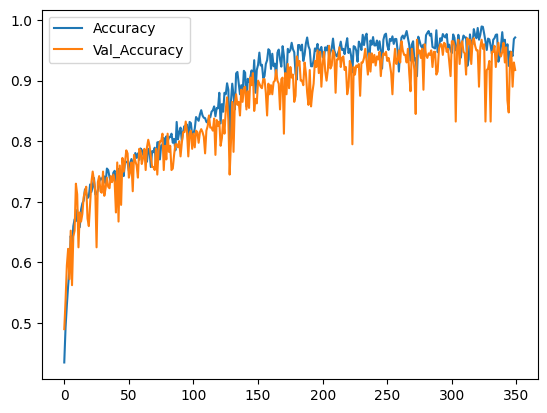

In [20]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [21]:
loss_f=pd.DataFrame(history.history)

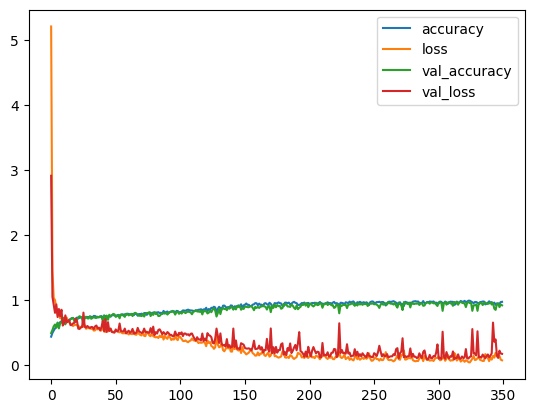

In [22]:
loss_f.plot();

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [24]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[103,   2,   0,   0],
       [  3,  88,   0,   0],
       [  0,   9,  83,   0],
       [  0,   0,  19,  93]])

In [25]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

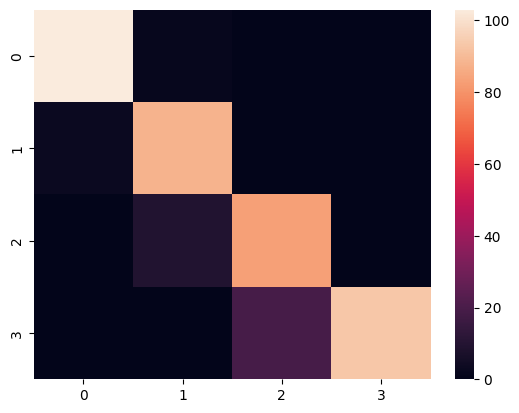

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [27]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.89      0.97      0.93        91
           2       0.81      0.90      0.86        92
           3       1.00      0.83      0.91       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400




### We got an accuracy of 0.95 in our model. Using this Model, the Seller can determine which category he will choose as the sales price when the mobile phone is produced.